# MNIST Neural Network
A simple neural network implementation for MNIST digit recognition

In [4]:
print("n")

n


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
import gzip
import os

np.random.seed(42)

In [6]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Download and Load MNIST Dataset

In [12]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile

def download_mnist_kaggle():
    """Download MNIST dataset from Kaggle"""
    try:
        # Initialize Kaggle API
        api = KaggleApi()
        api.authenticate()
        
        # Create mnist_data directory
        if not os.path.exists('mnist_data'):
            os.makedirs('mnist_data')
            
        # Download the dataset
        print('Downloading MNIST dataset from Kaggle...')
        api.dataset_download_files('hojjatk/mnist-dataset', path='mnist_data', unzip=True)
        print('Download complete!')
        
        return True
    except Exception as e:
        print(f"Kaggle download failed: {e}")
        return False

def load_mnist_images_uncompressed(filename):
    """Load MNIST images from uncompressed file"""
    with open(filename, 'rb') as f:
        data = f.read()
        # Skip header (16 bytes)
        images = np.frombuffer(data[16:], dtype=np.uint8)
        images = images.reshape(-1, 28, 28)
    return images

def load_mnist_labels_uncompressed(filename):
    """Load MNIST labels from uncompressed file"""
    with open(filename, 'rb') as f:
        data = f.read()
        # Skip header (8 bytes)
        labels = np.frombuffer(data[8:], dtype=np.uint8)
    return labels

# Try downloading from Kaggle
if download_mnist_kaggle():
    # Check which files exist and use the correct ones
    train_images_file = None
    train_labels_file = None
    test_images_file = None
    test_labels_file = None
    
    # Check for different file formats
    possible_train_images = [
        'mnist_data/train-images.idx3-ubyte',
        'mnist_data/train-images-idx3-ubyte/train-images-idx3-ubyte'
    ]
    possible_train_labels = [
        'mnist_data/train-labels.idx1-ubyte', 
        'mnist_data/train-labels-idx1-ubyte/train-labels-idx1-ubyte'
    ]
    possible_test_images = [
        'mnist_data/t10k-images.idx3-ubyte',
        'mnist_data/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
    ]
    possible_test_labels = [
        'mnist_data/t10k-labels.idx1-ubyte',
        'mnist_data/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'
    ]
    
    # Find existing files
    for f in possible_train_images:
        if os.path.exists(f):
            train_images_file = f
            break
            
    for f in possible_train_labels:
        if os.path.exists(f):
            train_labels_file = f
            break
            
    for f in possible_test_images:
        if os.path.exists(f):
            test_images_file = f
            break
            
    for f in possible_test_labels:
        if os.path.exists(f):
            test_labels_file = f
            break
    
    if all([train_images_file, train_labels_file, test_images_file, test_labels_file]):
        # Load training data
        X_train_raw = load_mnist_images_uncompressed(train_images_file)
        Y_train_raw = load_mnist_labels_uncompressed(train_labels_file)
        
        # Load test data  
        X_test_raw = load_mnist_images_uncompressed(test_images_file)
        Y_test_raw = load_mnist_labels_uncompressed(test_labels_file)
        
        print(f'Training images shape: {X_train_raw.shape}')
        print(f'Training labels shape: {Y_train_raw.shape}')
        print(f'Test images shape: {X_test_raw.shape}')
        print(f'Test labels shape: {Y_test_raw.shape}')
    else:
        print("Could not find all required MNIST files")
        print(f"Found: train_images={train_images_file}, train_labels={train_labels_file}")
        print(f"Found: test_images={test_images_file}, test_labels={test_labels_file}")
else:
    print("Please download MNIST files manually and place them in mnist_data folder")

Dataset URL: https://www.kaggle.com/datasets/hojjatk/mnist-dataset
Download complete!
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Download complete!
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
# Install required packages
!pip install kaggle python-dotenv

import os
import json
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get Kaggle credentials from environment variables
kaggle_username = os.getenv('KAGGLE_USERNAME')
kaggle_key = os.getenv('KAGGLE_KEY')

if not kaggle_username or not kaggle_key:
    print("Please set KAGGLE_USERNAME and KAGGLE_KEY environment variables")
    print("You can create a .env file with:")
    print("KAGGLE_USERNAME=your_username")
    print("KAGGLE_KEY=your_api_key")
else:
    # Set up Kaggle API credentials
    kaggle_json = {
        "username": kaggle_username,
        "key": kaggle_key
    }
    
    # Create .kaggle directory
    kaggle_dir = os.path.expanduser('~/.kaggle')
    os.makedirs(kaggle_dir, exist_ok=True)
    
    # Write credentials file
    with open(os.path.join(kaggle_dir, 'kaggle.json'), 'w') as f:
        json.dump(kaggle_json, f)
    
    # Set proper permissions
    os.chmod(os.path.join(kaggle_dir, 'kaggle.json'), 0o600)
    
    print('Kaggle credentials configured successfully from environment variables.')

### Manual MNIST Data Download Instructions

If you encounter a 404 error or download failure, please manually download the following files from the official MNIST site:

- [train-images-idx3-ubyte.gz](http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz)
- [train-labels-idx1-ubyte.gz](http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz)
- [t10k-images-idx3-ubyte.gz](http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz)
- [t10k-labels-idx1-ubyte.gz](http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz)

Place all four files in the `mnist_data` folder in your project directory.

After placing the files, re-run the notebook cells to continue.

## Data Preprocessing

Preprocessed training data shape: (784, 60000)
Preprocessed training labels shape: (10, 60000)


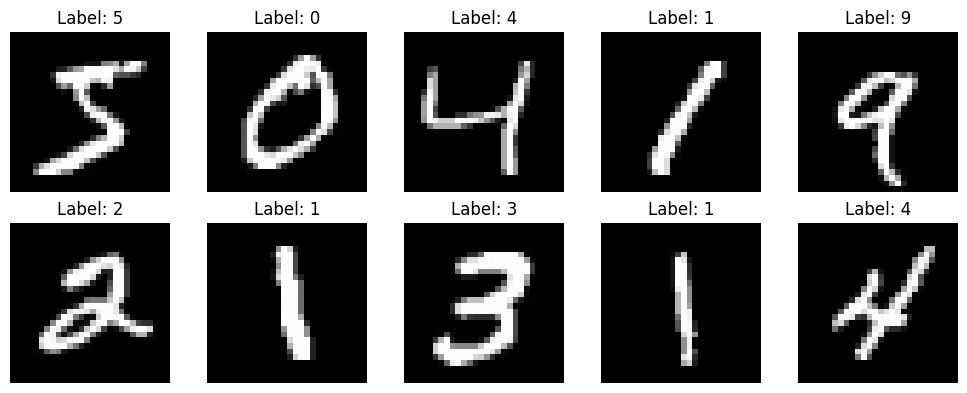

In [14]:
def preprocess_data(X, Y):
    """Preprocess the data for neural network training"""
    # Reshape images to vectors and normalize
    X = X.reshape(X.shape[0], -1).T  # Shape: (784, num_samples)
    X = X / 255.0  # Normalize to [0, 1]
    
    # One-hot encode labels
    Y_onehot = np.zeros((10, Y.shape[0]))
    for i, label in enumerate(Y):
        Y_onehot[label, i] = 1
    
    return X, Y_onehot

# Preprocess data
X_train, Y_train_onehot = preprocess_data(X_train_raw, Y_train_raw)
X_test, Y_test_onehot = preprocess_data(X_test_raw, Y_test_raw)
Y_train = Y_train_raw
Y_test = Y_test_raw

print(f'Preprocessed training data shape: {X_train.shape}')
print(f'Preprocessed training labels shape: {Y_train_onehot.shape}')

# Display some sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_raw[i], cmap='gray')
    ax.set_title(f'Label: {Y_train_raw[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

## Neural Network Functions

In [15]:
def init_params():
    """Initialize neural network parameters"""
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    """ReLU activation function"""
    return np.maximum(Z, 0)

def softmax(Z):
    """Softmax activation function"""
    A = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return A / np.sum(A, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    """Forward propagation"""
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    """Derivative of ReLU function"""
    return Z > 0

def one_hot(Y):
    """Convert labels to one-hot encoding"""
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    """Backward propagation"""
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    """Update parameters using gradient descent"""
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

## Training Functions

In [16]:
def get_predictions(A2):
    """Get predictions from output layer"""
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    """Calculate accuracy"""
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    """Train the neural network using gradient descent"""
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration {i}: Accuracy = {accuracy:.4f}")
    
    return W1, b1, W2, b2

## Train the Neural Network

In [17]:
# Train the model
print("Training neural network...")
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
print("Training complete!")

Training neural network...
Iteration 0: Accuracy = 0.1575
Iteration 10: Accuracy = 0.1920
Iteration 20: Accuracy = 0.2522
Iteration 30: Accuracy = 0.3070
Iteration 40: Accuracy = 0.3558
Iteration 50: Accuracy = 0.3988
Iteration 60: Accuracy = 0.4389
Iteration 70: Accuracy = 0.4781
Iteration 80: Accuracy = 0.5150
Iteration 90: Accuracy = 0.5472
Iteration 100: Accuracy = 0.5754
Iteration 110: Accuracy = 0.5996
Iteration 120: Accuracy = 0.6202
Iteration 130: Accuracy = 0.6401
Iteration 140: Accuracy = 0.6564
Iteration 150: Accuracy = 0.6716
Iteration 160: Accuracy = 0.6833
Iteration 170: Accuracy = 0.6935
Iteration 180: Accuracy = 0.7034
Iteration 190: Accuracy = 0.7121
Iteration 200: Accuracy = 0.7204
Iteration 210: Accuracy = 0.7277
Iteration 220: Accuracy = 0.7343
Iteration 230: Accuracy = 0.7409
Iteration 240: Accuracy = 0.7466
Iteration 250: Accuracy = 0.7520
Iteration 260: Accuracy = 0.7562
Iteration 270: Accuracy = 0.7606
Iteration 280: Accuracy = 0.7653
Iteration 290: Accuracy = 0

## Prediction and Visualization Functions

Testing predictions on training samples:
Prediction: 3
Label: 5


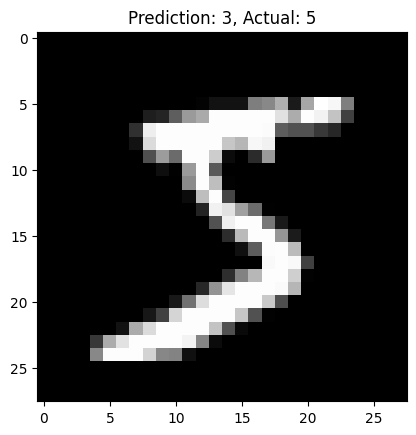

Prediction: 0
Label: 0


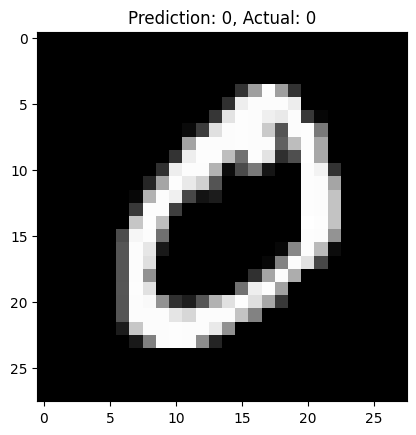

Prediction: 4
Label: 4


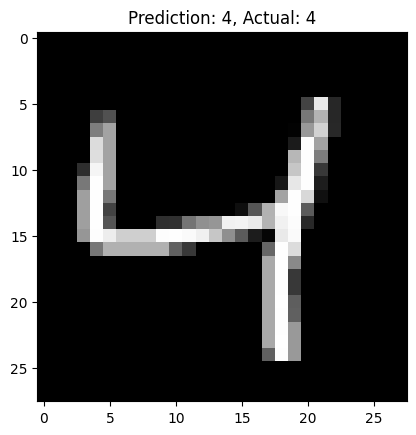

Prediction: 1
Label: 1


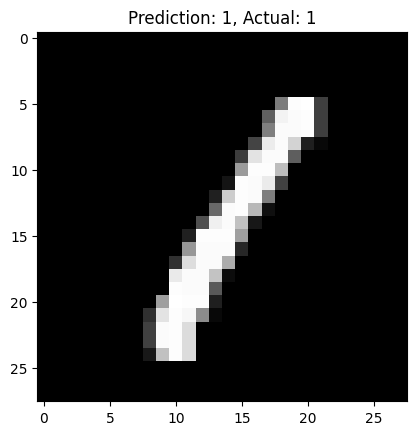

In [18]:
def make_predictions(X, W1, b1, W2, b2):
    """Make predictions on new data"""
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    """Test prediction on a single image and display it"""
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    
    print(f"Prediction: {prediction[0]}")
    print(f"Label: {label}")
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.title(f'Prediction: {prediction[0]}, Actual: {label}')
    plt.show()

# Test predictions on some samples
print("Testing predictions on training samples:")
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

## Evaluate on Test Set

Test Accuracy: 0.8340


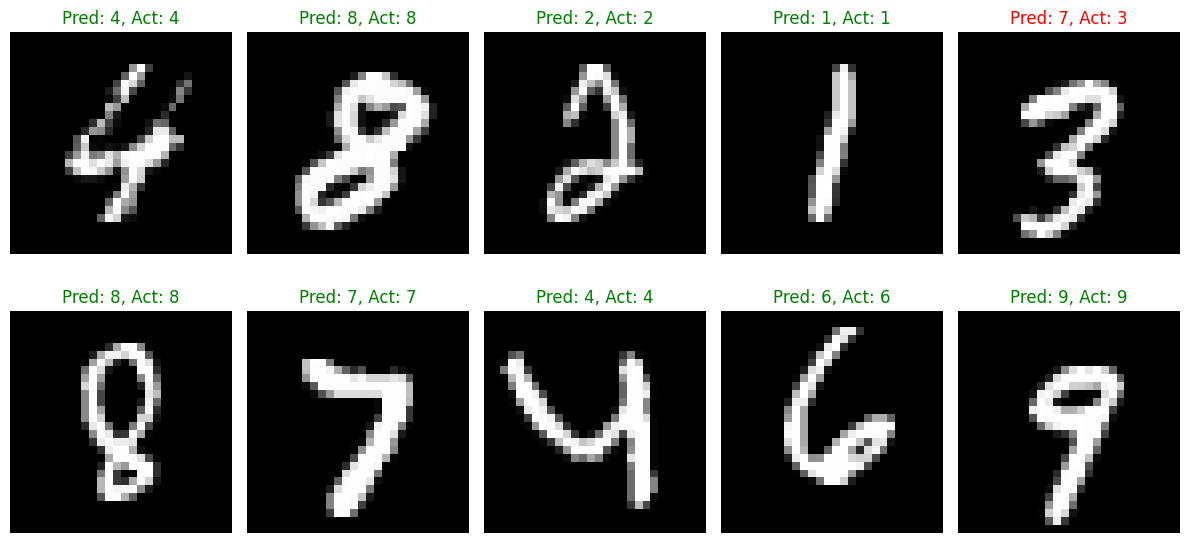

In [20]:
# Evaluate on test set
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
test_accuracy = get_accuracy(test_predictions, Y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Show some test predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, X_test.shape[1])
    image = X_test[:, idx].reshape(28, 28)
    prediction = make_predictions(X_test[:, idx, None], W1, b1, W2, b2)[0]
    actual = Y_test[idx]
    
    ax.imshow(image, cmap='gray')
    color = 'green' if prediction == actual else 'red'
    ax.set_title(f'Pred: {prediction}, Act: {actual}', color=color)
    ax.axis('off')

plt.tight_layout()
plt.show()